In [75]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [76]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


C:\Users\albin\AppData\Local\Temp\ipykernel_43200\92519664.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Not Available", inplace=True)
C:\Users\albin\AppData\Local\Temp\ipykernel_43200\92519664.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Not Available", inplace=True)
C:\Users\albin\AppData\Local\Temp\ipykernel_43200\92519664.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Not 

silhouette_score: 0.2597191588001664
davies_bouldin_score: 1.3942770679942253


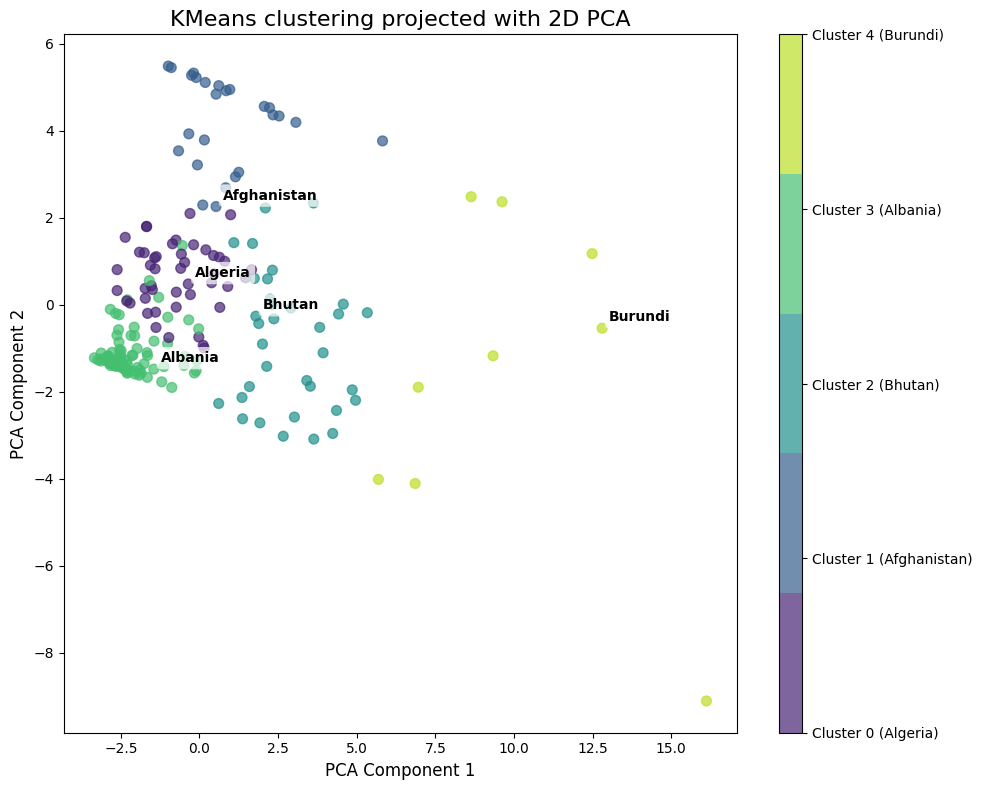

In [77]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from utils.functions import plot_clusters_2d
from utils.functions import evaluate_clusters


# Function to process and pivot each dataframe
def process_and_pivot(df, prefix):
    df.fillna(df.mean(numeric_only=True), inplace=True)
    df.fillna("Not Available", inplace=True)
    
    df_filtered = df[['Location', 'Period', 'Value']]
    df_pivoted = df_filtered.pivot(index='Location', columns='Period', values='Value')
    df_pivoted = df_pivoted.rename(columns=lambda x: f"{prefix}_{x}")
    
    return df_pivoted.reset_index()

# Load the datasets
advertisingBan = pd.read_csv('../data/advertising_ban_internet.csv')
affordability = pd.read_csv('../data/affordability.csv')
gdp2000Cigs = pd.read_csv('../data/gdp_for_2000_cigs.csv')
healthWarningPhoto = pd.read_csv('../data/health_warning_photo.csv')
requiredHealthWarnings = pd.read_csv('../data/required_health_warning.csv')

# Process and pivot each dataframe
advertisingBan_pivoted = process_and_pivot(advertisingBan, 'advertisingBan')
affordability_pivoted = process_and_pivot(affordability, 'affordability')
#ageStandardized_pivoted = process_and_pivot(ageStandardized, 'ageStandardized')
gdp2000Cigs_pivoted = process_and_pivot(gdp2000Cigs, 'gdp2000Cigs')
healthWarningPhoto_pivoted = process_and_pivot(healthWarningPhoto, 'healthWarningPhoto')
requiredHealthWarnings_pivoted = process_and_pivot(requiredHealthWarnings, 'requiredHealthWarnings')

# Merge the pivoted dataframes on 'Location'
combined_df = advertisingBan_pivoted.merge(affordability_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(gdp2000Cigs_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(healthWarningPhoto_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(requiredHealthWarnings_pivoted, on='Location', how='outer')

# Drop 'Location' for clustering
data_for_clustering = combined_df.drop(columns=['Location'])

# Preprocessing pipeline: imputing, encoding, and scaling
numeric_features = data_for_clustering.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data_for_clustering.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Prepare the final data for clustering
clustering_data = preprocessor.fit_transform(data_for_clustering)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(clustering_data)

mask = kmeans.labels_ != -1
data = clustering_data[mask]
labels = kmeans.labels_[mask]

evaluate_clusters(silhouette_score, data, labels)
evaluate_clusters(davies_bouldin_score, data, labels)

plot_clusters_2d(kmeans, clustering_data, combined_df)


# Find good clusters on KMeans

In [78]:
result = pd.DataFrame(columns=['k', 'silhouette' ,'davies_bouldin'])
import numpy as np
K = np.arange(2, 100, 2)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(clustering_data)
    mask = kmeans.labels_ != -1
    data = clustering_data[mask]
    labels = kmeans.labels_[mask]

    silhouette = evaluate_clusters(silhouette_score, data, labels)
    davies_bouldin = evaluate_clusters(davies_bouldin_score, data, labels)
    
    result.loc[len(result)] = [k, silhouette, davies_bouldin]
    


silhouette_score: 0.4231238355471393
davies_bouldin_score: 1.2728860102643698
silhouette_score: 0.2674726943728128
davies_bouldin_score: 1.374408028391163
silhouette_score: 0.20717466552282407
davies_bouldin_score: 1.3463716171556568
silhouette_score: 0.25244331578065293
davies_bouldin_score: 1.2092485030791658
silhouette_score: 0.25392080825374613
davies_bouldin_score: 1.2805927923687332
silhouette_score: 0.2490311807143231
davies_bouldin_score: 1.1725658948433646
silhouette_score: 0.27425391379883335
davies_bouldin_score: 1.1226490401315852
silhouette_score: 0.248584876180524
davies_bouldin_score: 1.2386418907962378
silhouette_score: 0.2626122919554676
davies_bouldin_score: 1.1115071445336775
silhouette_score: 0.26489487202255035
davies_bouldin_score: 1.141776035203145
silhouette_score: 0.2424145780333902
davies_bouldin_score: 1.1429873806281259
silhouette_score: 0.2517570744506606
davies_bouldin_score: 1.2232914813252467
silhouette_score: 0.25740174904775576
davies_bouldin_score: 1.

# Plotting silhouette + davies-bouldin metrics
- high silhouette is good
- low davies-bouldin is good

Text(0, 0.5, 'score')

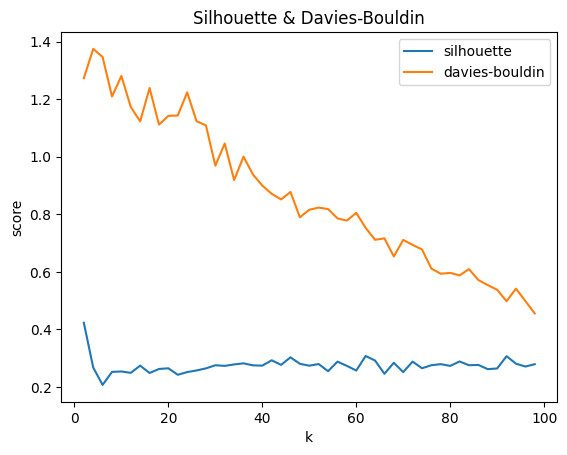

In [81]:
import matplotlib.pyplot as plt
k_sort = result.sort_values('k', ascending=True)
plt.plot(k_sort['k'], k_sort['silhouette'])
plt.plot(k_sort['k'], k_sort['davies_bouldin'])
plt.legend(['silhouette', 'davies-bouldin'])
plt.title('Silhouette & Davies-Bouldin')
plt.xlabel('k')
plt.ylabel('score')

#### Increasing k makes better cohesion in clusters, but separation is unchanged. Too many clusters

# Try with DBSCAN

In [87]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

eps_list = np.linspace(0.5, 3, 8)
min_samples_list = np.arange(2, 20, 2)
score = np.zeros((len(eps_list), len(min_samples_list)))

result = pd.DataFrame(columns=['eps', 'min_samples', 'silhouette' ,'davies_bouldin'])

for eps in range(len(eps_list)):
    for min_samples in range(len(min_samples_list)):
        dbscan = DBSCAN(eps=eps_list[eps], min_samples=min_samples_list[min_samples])
        dbscan.fit(clustering_data)
        mask = dbscan.labels_ != -1
        data = clustering_data[mask]
        labels = dbscan.labels_[mask]
        combined_df['Cluster'] = dbscan.labels_
             
        silhouette = evaluate_clusters(silhouette_score, data, labels)
        davies_bouldin = evaluate_clusters(davies_bouldin_score, data, labels)
        result.loc[len(result)] = [eps_list[eps], min_samples_list[min_samples], silhouette, davies_bouldin]

        #print("-----------------------")
        #print(f"Epsilon: {eps_list[eps]}")
        #print(f"Min Samples: {min_samples_list[min_samples]}")
        #score[eps, min_samples] = evaluate_clusters(silhouette_score, data, labels)
        #score[eps, min_samples] = evaluate_clusters(davies_bouldin_score, data, labels)
        #print("Number of clusters: " ,len(np.unique(labels)))
        #for label in np.unique(labels):
        #    print(f"Number of points in cluster {label}: {len(data[labels == label])}")
        #    representative_countries = np.array(combined_df.loc[combined_df['Cluster']==label, 'Location'])
        #    print(representative_countries)
        #    print()

        #plot_clusters_2d(dbscan, clustering_data, combined_df, noise=True)


silhouette_score: 0.7333014044206727
davies_bouldin_score: 0.27143640099247257
silhouette_score: 0.7531117653062646
davies_bouldin_score: 0.33090472988102115
silhouette_score: 0.8627241093837335
davies_bouldin_score: 0.18553837509914262
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
silhouette_score: 0.6262344229652154
davies_bouldin_score: 0.46038863862954765
silhouette_score: 0.7228459405394494
davies_bouldin_score: 0

([<matplotlib.axis.XTick at 0x1bf691fe020>,
 [Text(0.5, 0, '0.500'),
  Text(0.8571428571428572, 0, '0.857'),
  Text(1.2142857142857144, 0, '1.214'),
  Text(1.5714285714285714, 0, '1.571'),
  Text(1.9285714285714286, 0, '1.929'),
  Text(2.2857142857142856, 0, '2.286'),
  Text(2.642857142857143, 0, '2.643'),
  Text(3.0, 0, '3.000')])

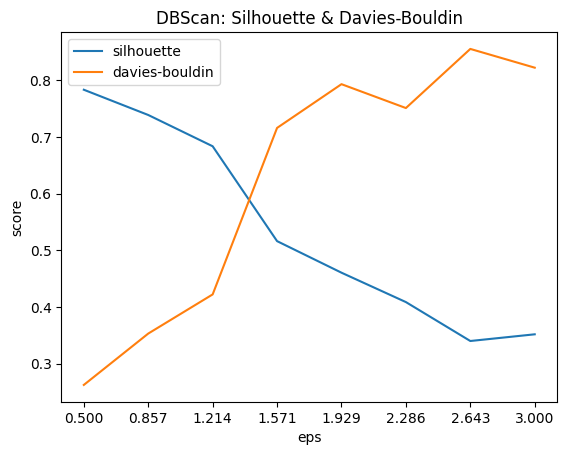

In [88]:
import matplotlib.pyplot as plt
sort = result.sort_values('eps', ascending=True)
eps = sort.groupby('eps').mean()
plt.plot(eps.index, eps['silhouette'])
plt.plot(eps.index, eps['davies_bouldin'])
plt.title('DBScan: Silhouette & Davies-Bouldin')
plt.legend(['silhouette', 'davies-bouldin'])
plt.xlabel('eps')
plt.ylabel('score')
plt.xticks(eps_list)

([<matplotlib.axis.XTick at 0x1bf691062f0>,
 [Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18')])

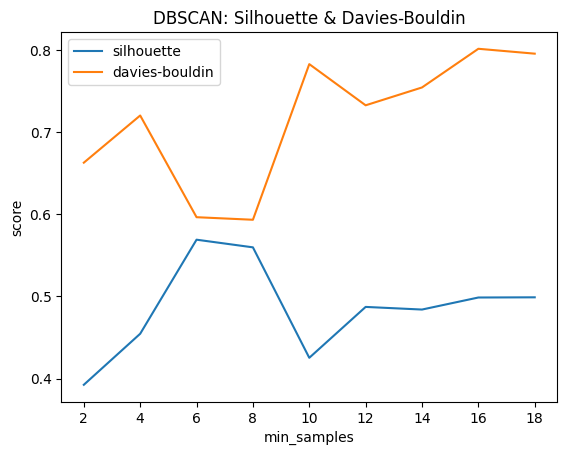

In [84]:
import matplotlib.pyplot as plt
sort = result.sort_values('min_samples', ascending=True)
min_samp = sort.groupby('min_samples').mean()
plt.plot(min_samp.index, min_samp['silhouette'])
plt.plot(min_samp.index, min_samp['davies_bouldin'])
plt.title('DBSCAN: Silhouette & Davies-Bouldin')
plt.legend(['silhouette', 'davies-bouldin'])
plt.xlabel('min_samples')
plt.ylabel('score')
plt.xticks(min_samples_list)

silhouette_score: 0.2597191588001664
davies_bouldin_score: 1.3942770679942253


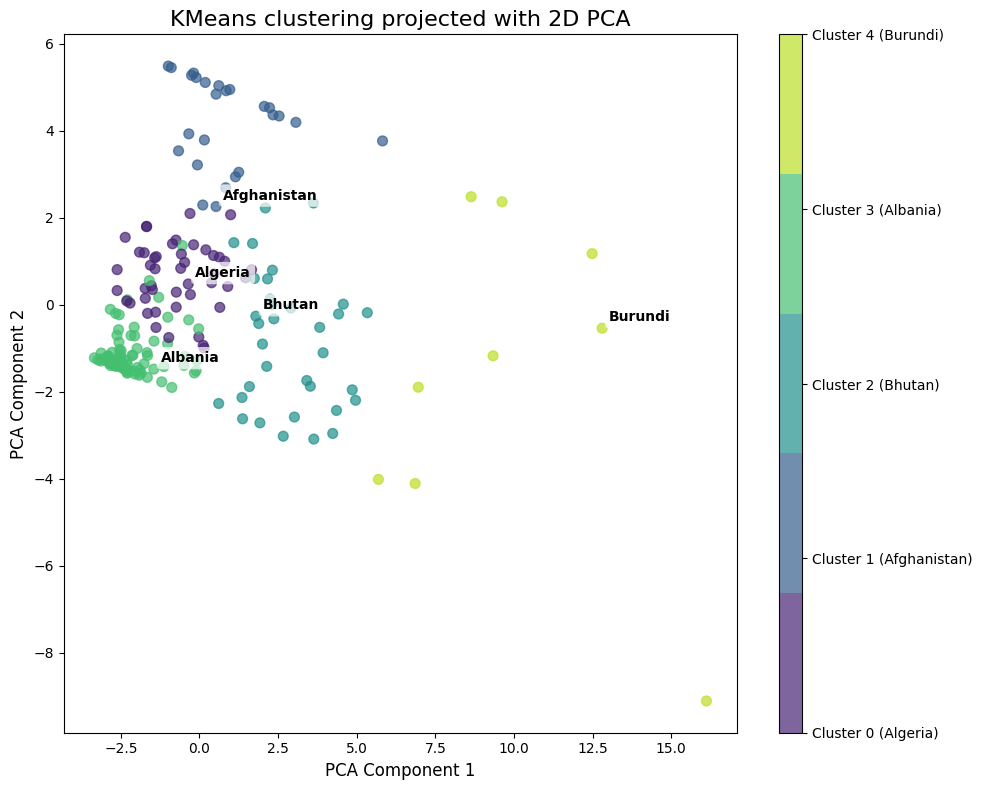